In [1]:
pip install seaborn 

     |████████████████████████████████| 292 kB 15.4 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

     |████████████████████████████████| 15.2 MB 14.4 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U scikit-learn

     |████████████████████████████████| 22.2 MB 1.4 MB/s             
     |████████████████████████████████| 309 kB 62.4 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from pandas.plotting import scatter_matrix

sns.set()


In [20]:
def load_datasets():
    data=pd.read_csv('vivino.csv')
    return data

raw_wine_df = load_datasets()

In [21]:
def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape)
    print("First 10 rows of dataset:")
    print(dataset.head(10))
    print("Statistical summary:")
    print(dataset.describe())

print_summarize_dataset(raw_wine_df)

Dataset dimension:
(8650, 9)
First 10 rows of dataset:
                       Winery  Year  Wine ID  \
0                   Viña Oria  2019  1812139   
1                       Ayuso  2017  2084964   
2           Castillo de Liria  2020  1643745   
3           Castillo de Liria  2019  1643745   
4  Finca Venta de Don Quijote  2020  7166356   
5     Schenk Spanish Wineries  2019  1884409   
6                      Antaño  2020  1401663   
7     Marqués de la Concordia  2015  2805851   
8           Palacio del Conde  2018  1209992   
9                       Ayuso  2015  2381489   

                                   Wine  Rating  num_review  price Country  \
0                         Garnacha 2019     3.5         327   2.50  España   
1           Abadia del Roble Tinto 2017     2.9          52   2.54  España   
2                   Bobal - Shiraz 2020     3.4          85   2.56  España   
3                   Bobal - Shiraz 2019     3.6         305   2.56  España   
4              Tempranillo

In [22]:
def clean_dataset(data):
    data.dropna(axis=0, inplace=True)
    data["num_review"] = data["num_review"].astype(np.int)
    data["Wine ID"] = data["Wine ID"].astype(np.int)
    data["price"] = data["price"].astype(np.int)
    data['region'] = 'unknown'
    data.dropna()
    return data

ideal_wine_df = clean_dataset(raw_wine_df)

print(ideal_wine_df.head())


print("Missing values in ideal_wine_df: ")
print(ideal_wine_df.isnull().sum())


                       Winery  Year  Wine ID                         Wine  \
0                   Viña Oria  2019  1812139                Garnacha 2019   
1                       Ayuso  2017  2084964  Abadia del Roble Tinto 2017   
2           Castillo de Liria  2020  1643745          Bobal - Shiraz 2020   
3           Castillo de Liria  2019  1643745          Bobal - Shiraz 2019   
4  Finca Venta de Don Quijote  2020  7166356     Tempranillo - Syrah 2020   

   Rating  num_review  price Country     Region   region  
0     3.5         327      2  España   Cariñena  unknown  
1     2.9          52      2  España  La Mancha  unknown  
2     3.4          85      2  España   Valencia  unknown  
3     3.6         305      2  España   Valencia  unknown  
4     3.6         129      2  España   Castilla  unknown  
Missing values in ideal_wine_df: 
Winery        0
Year          0
Wine ID       0
Wine          0
Rating        0
num_review    0
price         0
Country       0
Region        0
regio

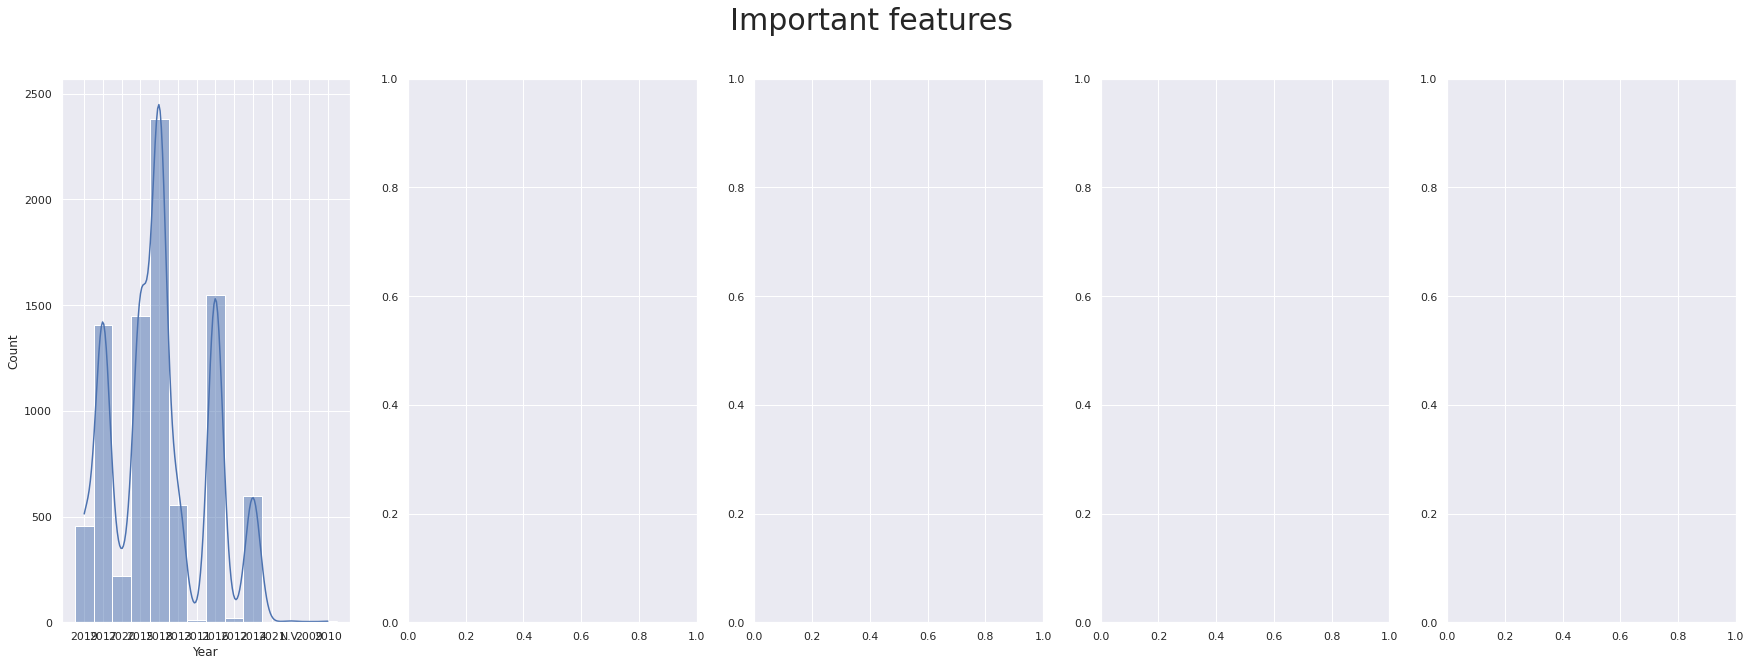

In [23]:
def print_histograms(dataset):
    fig, axes = plt.subplots(1, 5, figsize=(30, 10))
    for i, col in enumerate(dataset.columns[1:6]):
        sns.histplot(dataset[col], ax=axes[i], kde=True)
        fig.suptitle("Important features", fontsize=30)
        plt.show()
        
print_histograms(ideal_wine_df)

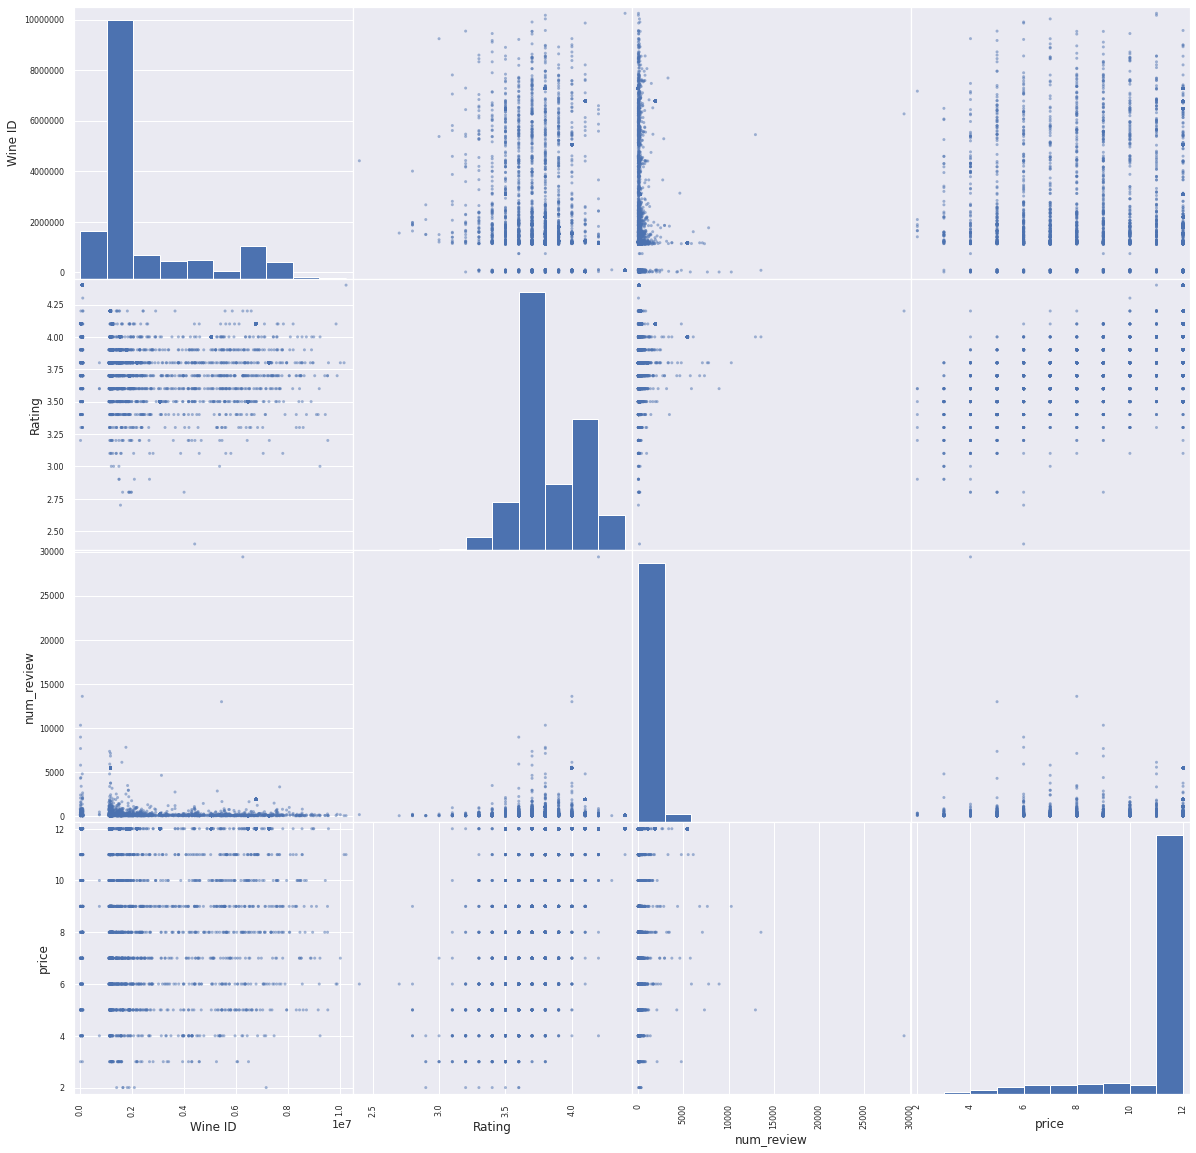

In [24]:

def print_scatter_matrix(dataset):
    scatter_matrix(dataset, figsize=(20,20))
    plt.show()

print_scatter_matrix(ideal_wine_df)


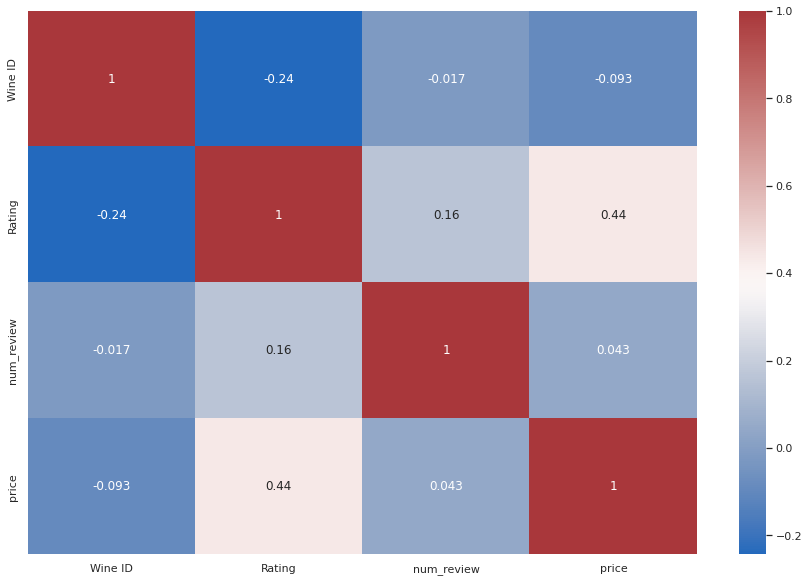

In [25]:
def compute_correlations_matrix(dataset):
    corrMatrix = dataset.corr()
    plt.figure(figsize=(15,10))
    sns.heatmap(corrMatrix, annot=True, cmap='vlag')
    plt.show()

compute_correlations_matrix(ideal_wine_df)

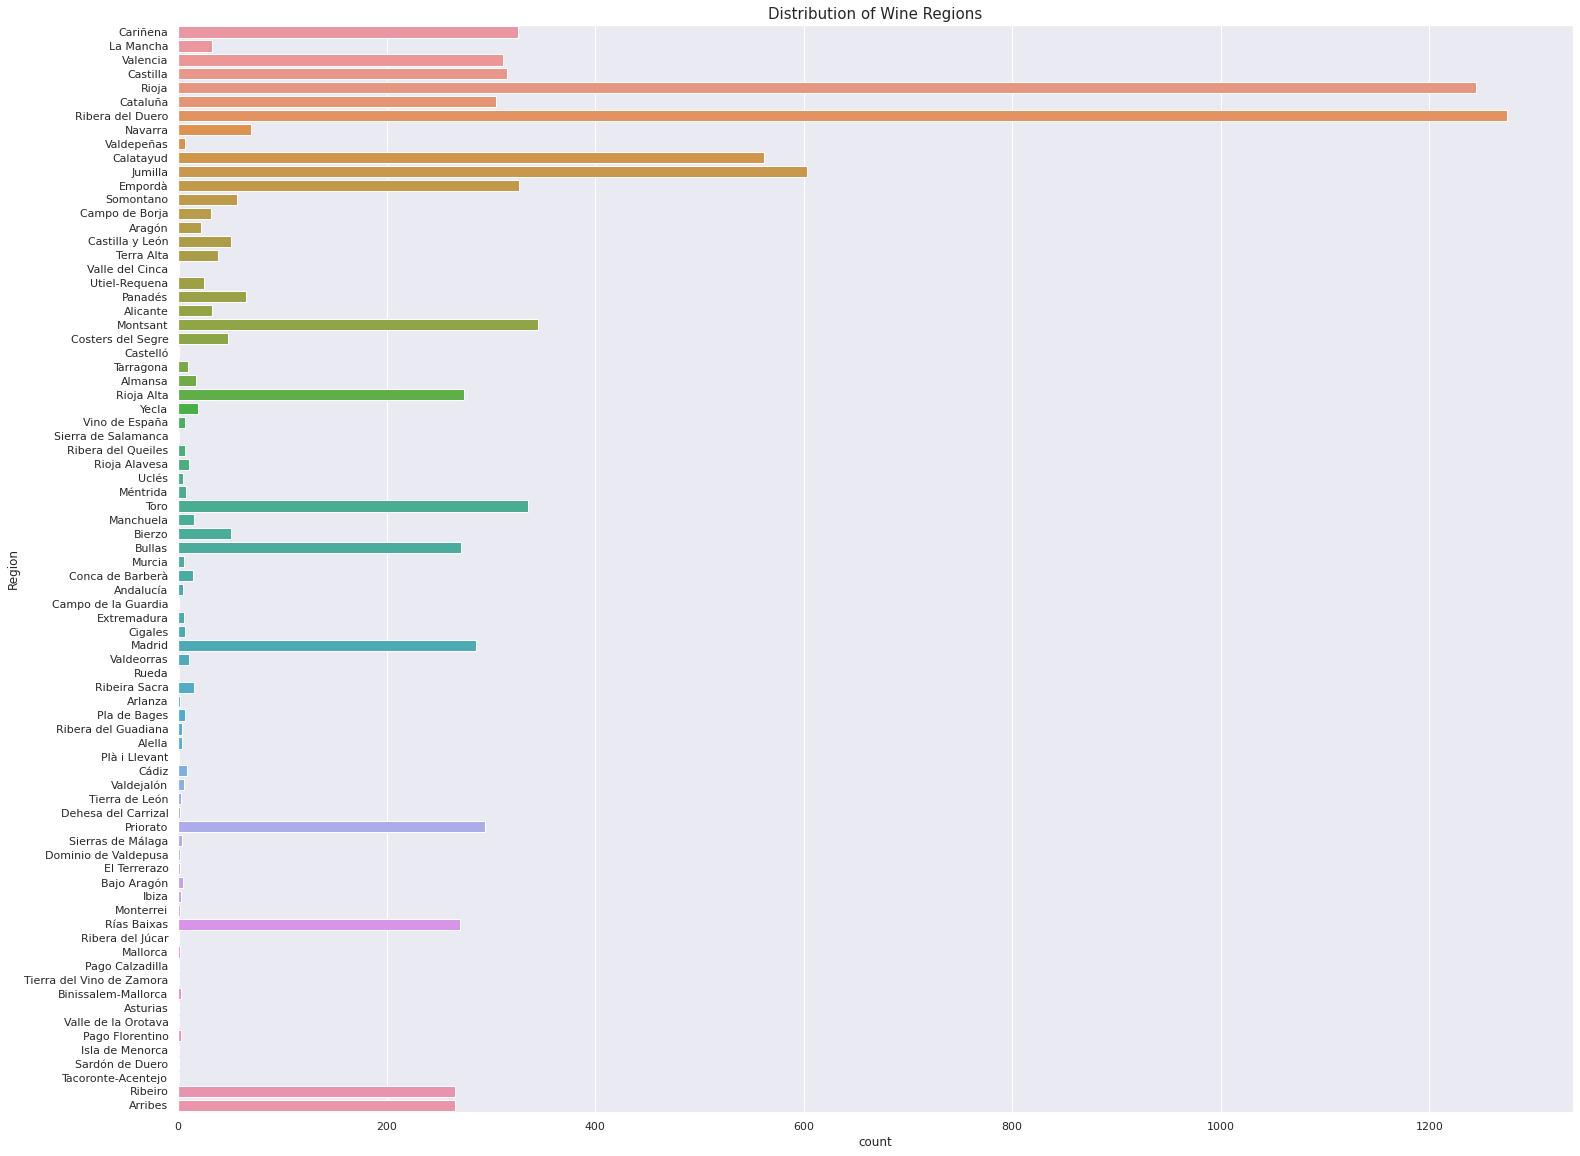

In [26]:
def get_wine_region(dataframe):
    plt.figure(figsize=(25, 20))
    plt.title('Distribution of Wine Regions', fontsize=15)
    sns.countplot(y='Region', data=dataframe)
    plt.show()
get_wine_region(ideal_wine_df)


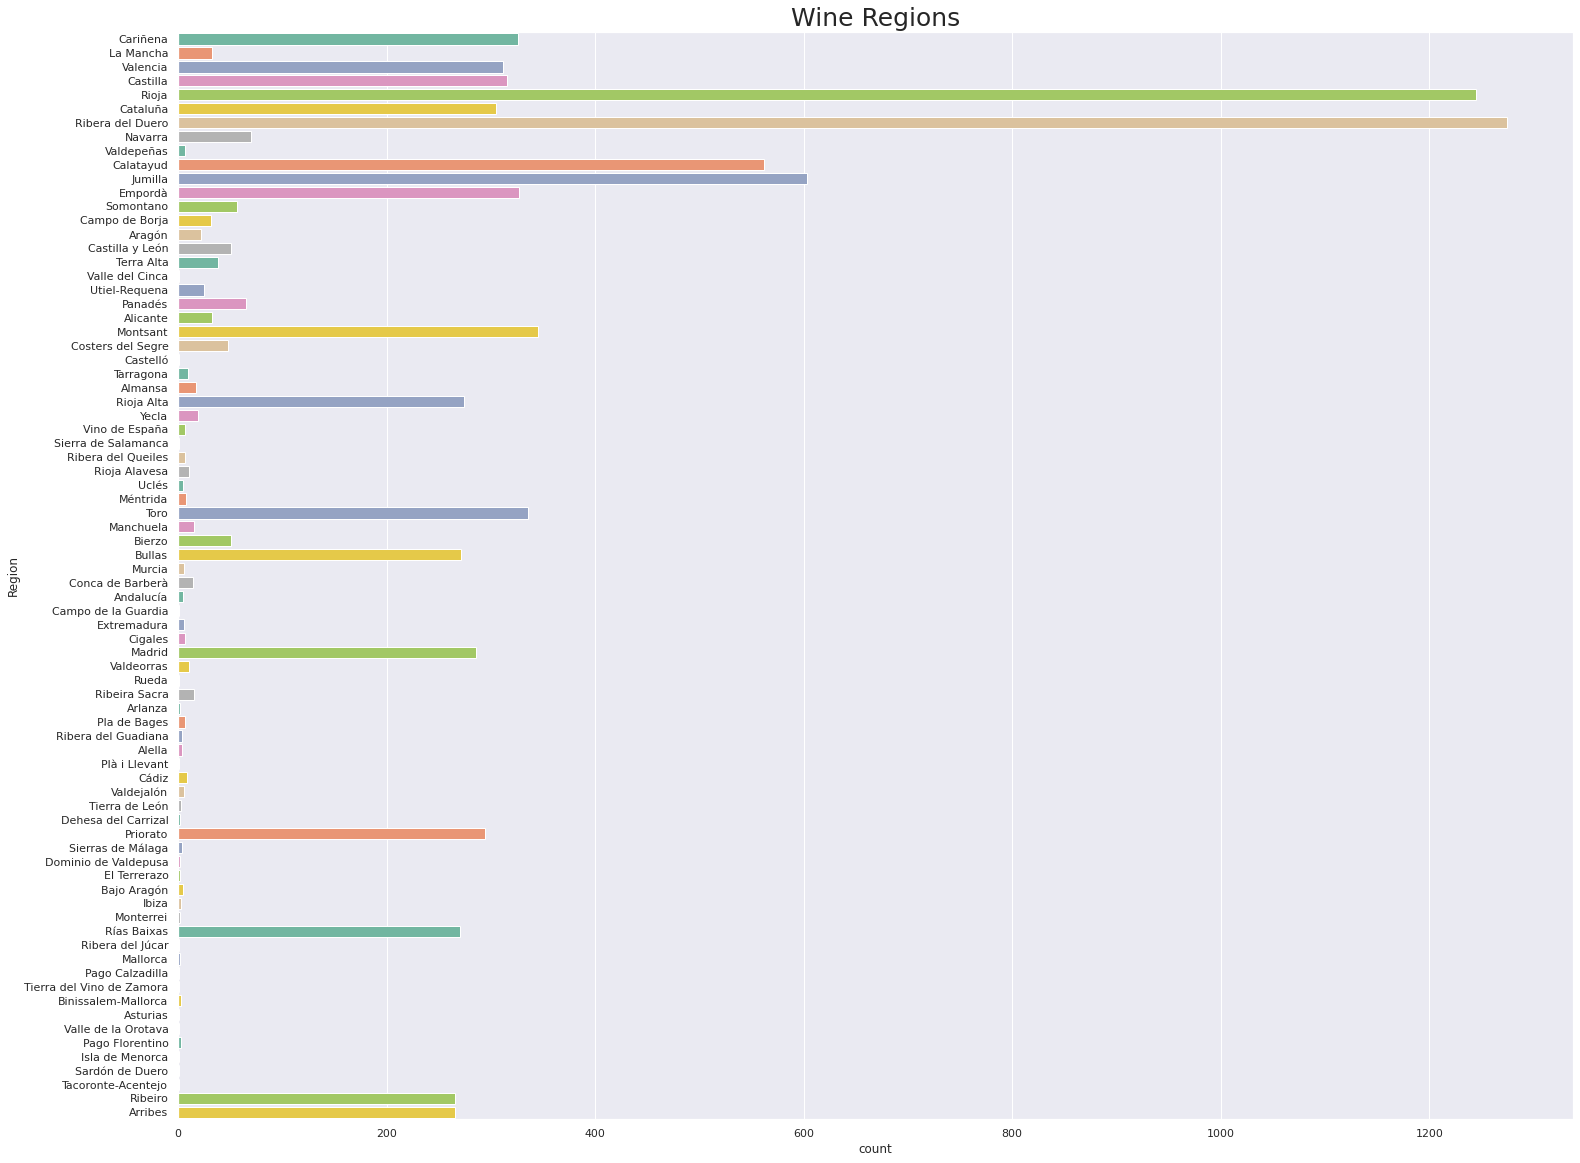

In [27]:
def plot_wine_region(dataframe):
    plt.figure(figsize=(25, 20))
    plt.title('Wine Regions', fontsize = 25)
    sns.countplot(y='Region', data=dataframe, palette='Set2')

plot_wine_region(ideal_wine_df)

In [28]:
def get_wine_style(dataframe):
    plt.figure(figsize=(15, 10))
    plt.title('Distribution of Wine Styles', fontsize=25)
    sns.countplot(y='Style', data=dataframe, palette = "Set2")
    plt.show()

print(ideal_wine_df.columns)

ideal_wine_df['Rating'].nlargest(15)

Index(['Winery', 'Year', 'Wine ID', 'Wine', 'Rating', 'num_review', 'price',
       'Country', 'Region', 'region'],
      dtype='object')


1791    4.4
2015    4.4
2038    4.4
2065    4.4
2090    4.4
2113    4.4
2138    4.4
2163    4.4
2190    4.4
2213    4.4
2240    4.4
2263    4.4
2288    4.4
2313    4.4
2340    4.4
Name: Rating, dtype: float64

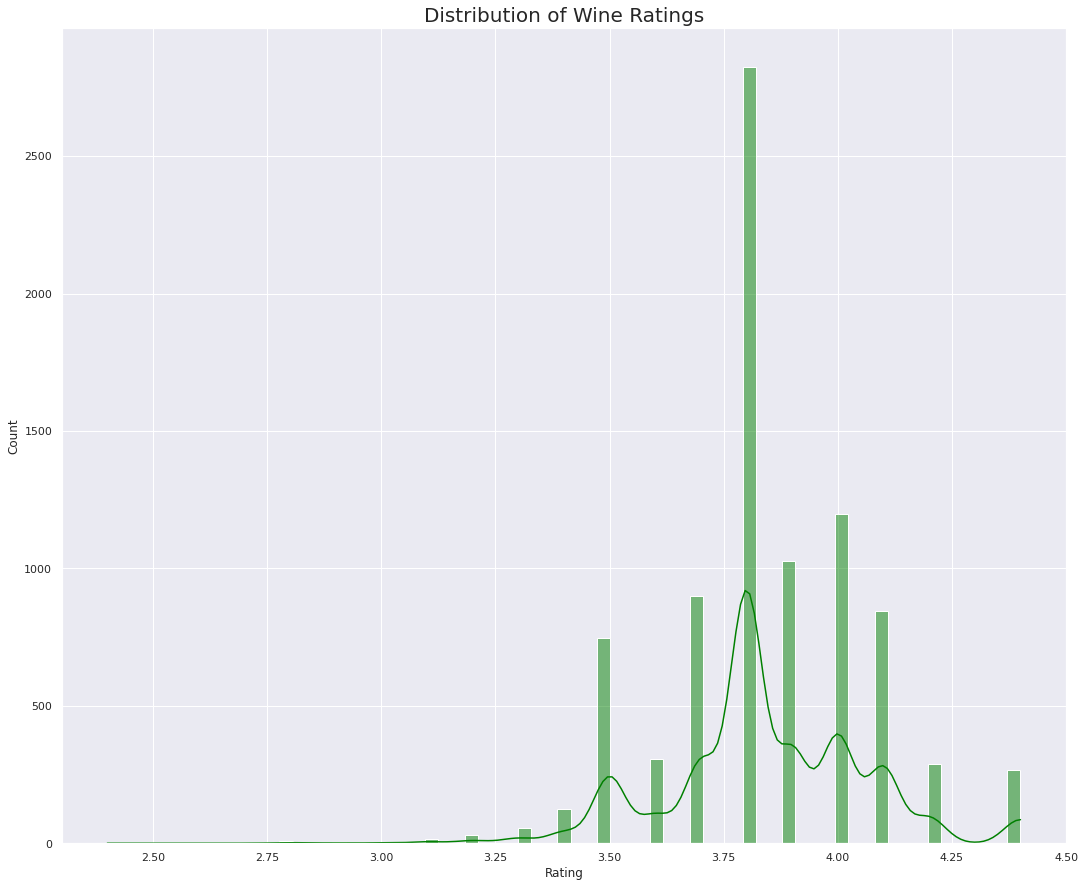

In [29]:
def freq_of_ratings(dataset):
    plt.figure(figsize = (18, 15))
    plt.title('Distribution of Wine Ratings', fontsize=20)
    sns.histplot(data=dataset, x="Rating", kde=True, color= "green")
    plt.show()

freq_of_ratings(ideal_wine_df)

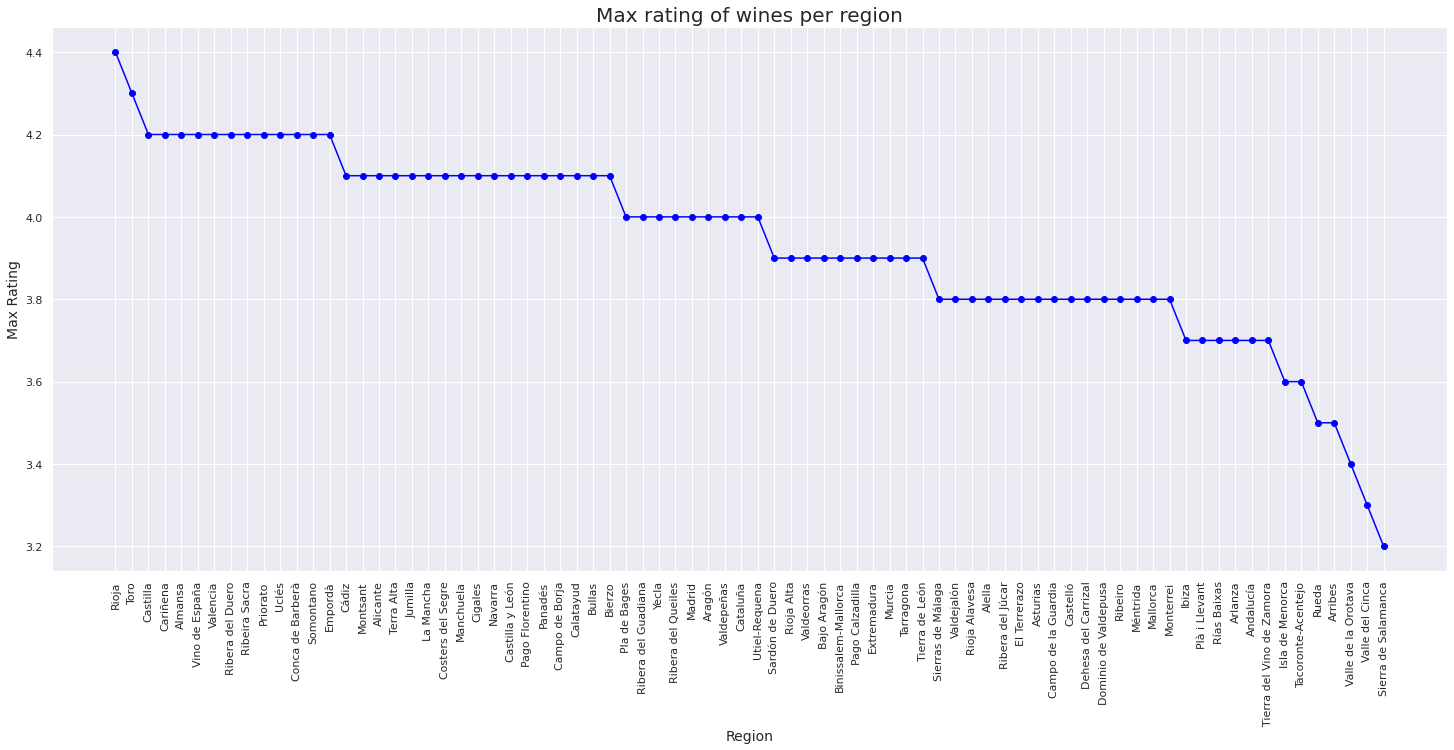

In [30]:
def plot_max_rating(dataset):
    rev = dataset.groupby('Region')[['Rating']].max().sort_values(by='Rating', ascending=False)
    cat = rev.index.tolist()
    rat = rev.Rating.tolist()
    plt.figure(figsize=(25, 10))
    plt.plot(cat, rat, color='blue', marker='o')
    plt.title('Max rating of wines per region', fontsize=20)
    plt.xlabel('Region', fontsize=14)
    plt.ylabel('Max Rating', fontsize=14)
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

# Example usage
plot_max_rating(ideal_wine_df)

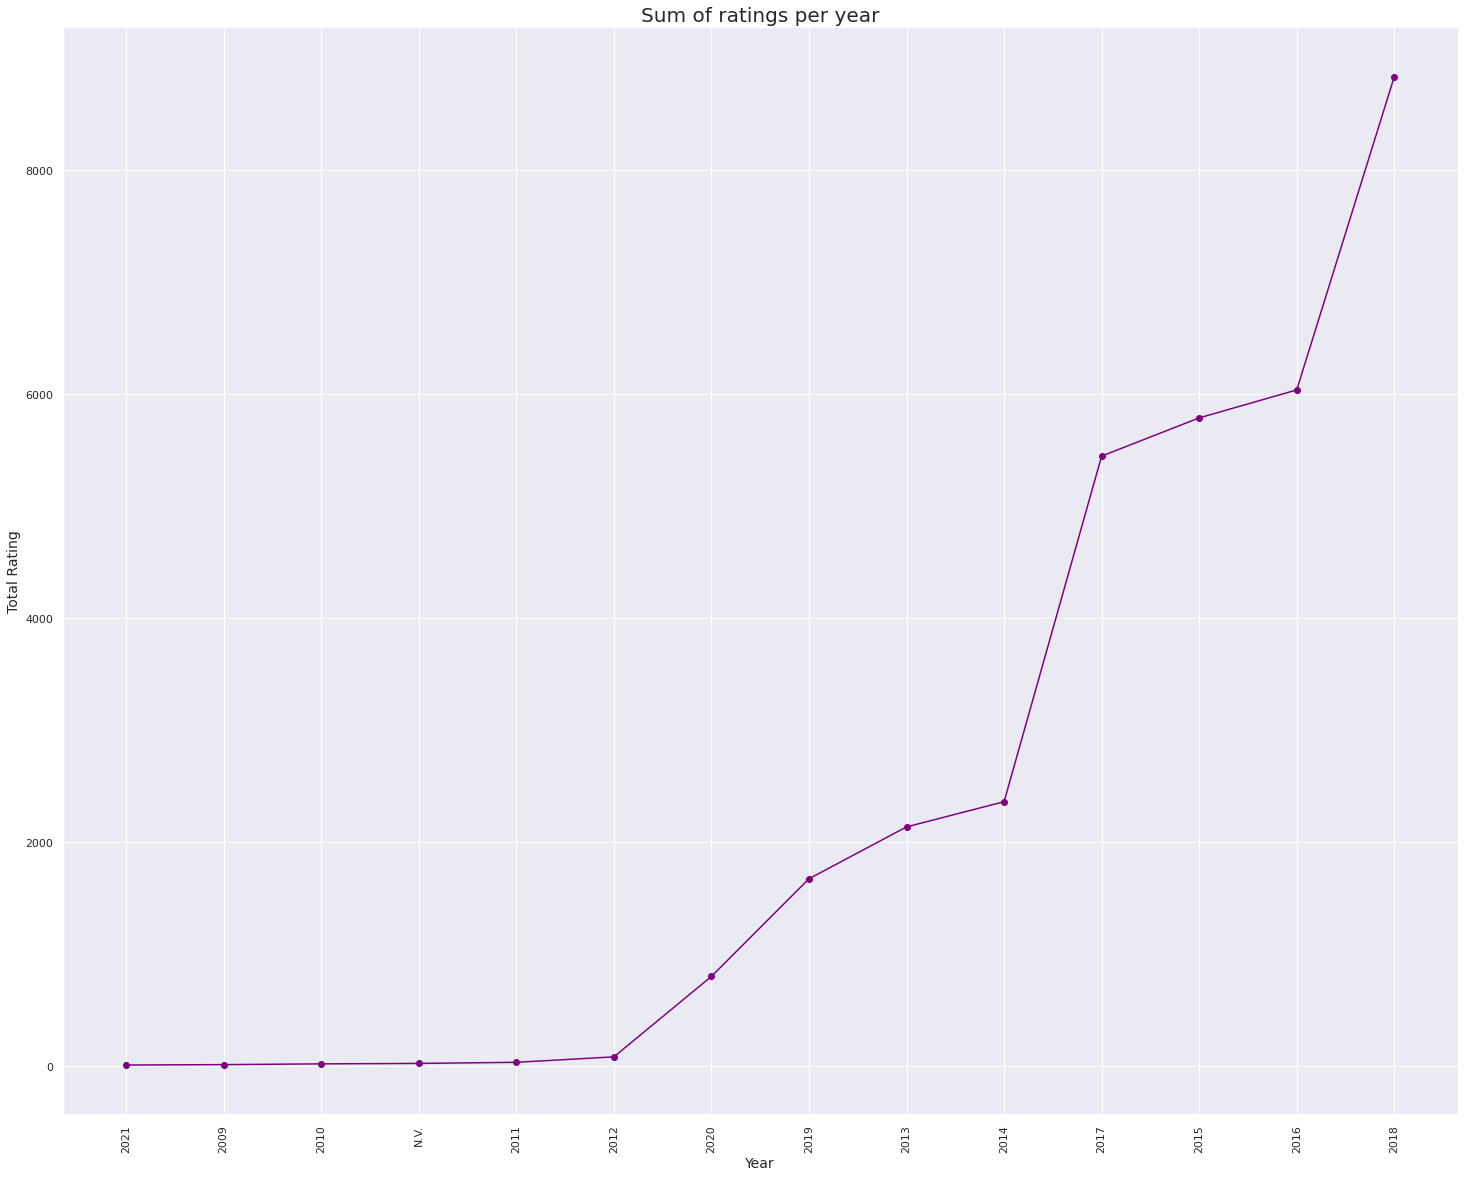

In [31]:
def plot_rating_sum(dataset):
    rating_sum = dataset.groupby('Year')['Rating'].sum().sort_values()
    years = rating_sum.index.tolist()
    ratings = rating_sum.tolist()
    plt.figure(figsize=(25, 20))
    plt.plot(years, ratings, color='purple', marker='o')
    plt.title('Sum of ratings per year', fontsize=20)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Total Rating', fontsize=14)
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

# Example usage
plot_rating_sum(ideal_wine_df)

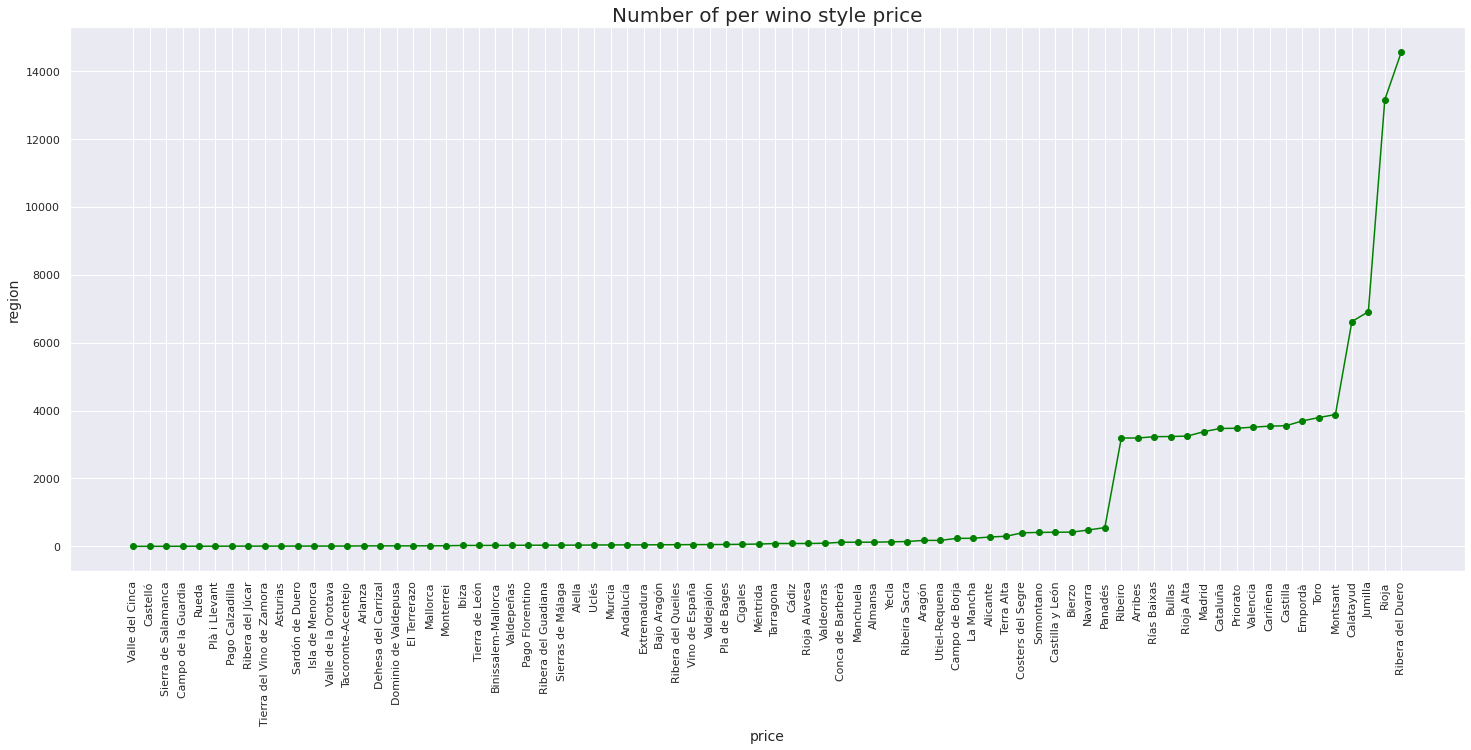

In [32]:
def rank_perstyle(dataset):
    rev = dataset.groupby('Region')[['price']].sum().sort_values(by='price', ascending=True)
    cat = []
    r = []
    for i in range(len(rev)):
        cat.append(rev.price[i])
        r.append(rev.index[i])
    plt.figure(figsize = (25, 10))
    plt.plot(r, cat, color='green', marker='o')
    plt.title('Number of per wino style price', fontsize=20)
    plt.xlabel('price', fontsize=14)
    plt.ylabel('region', fontsize=14)
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()


rank_perstyle(ideal_wine_df)

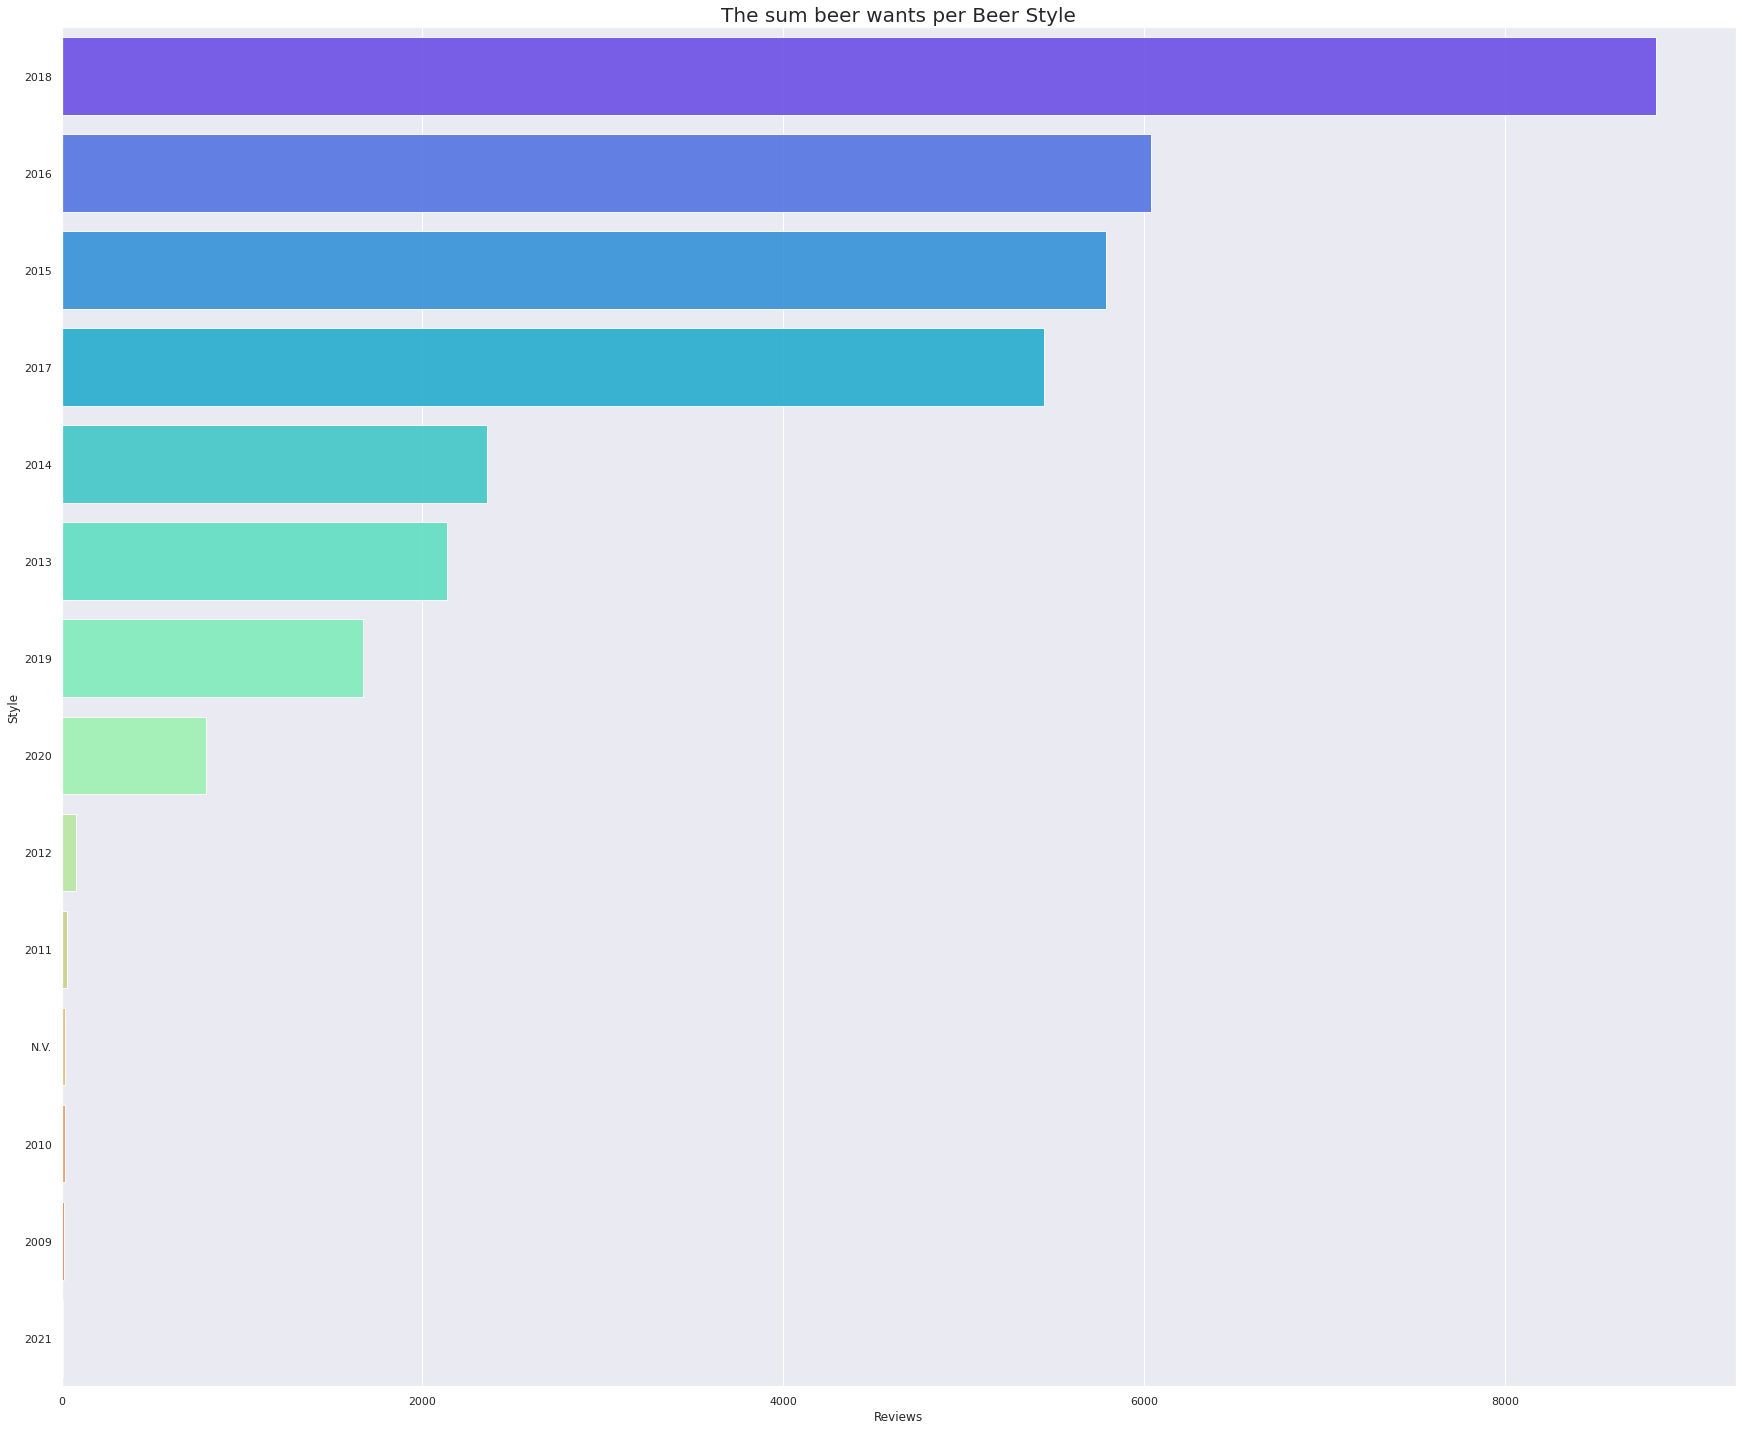

In [33]:
def sum_beerwants_per_categ(dataset):
    mean_pr_categ = dataset.groupby('Year')[['Rating']].sum().sort_values(by='Rating', ascending=False)
    price = []
    categ = []
    for i in range(len(mean_pr_categ)):
        price.append(mean_pr_categ.Rating[i])
        categ.append(mean_pr_categ.index[i])
    plt.figure(figsize=(30,25))
    plt.xlabel("Reviews")
    plt.ylabel("Style")
    graph = sns.barplot(x = price, y = categ, alpha =0.9, palette= "rainbow")
    graph.set_title("The sum beer wants per Beer Style", fontsize = 20) 


sum_beerwants_per_categ(ideal_wine_df)

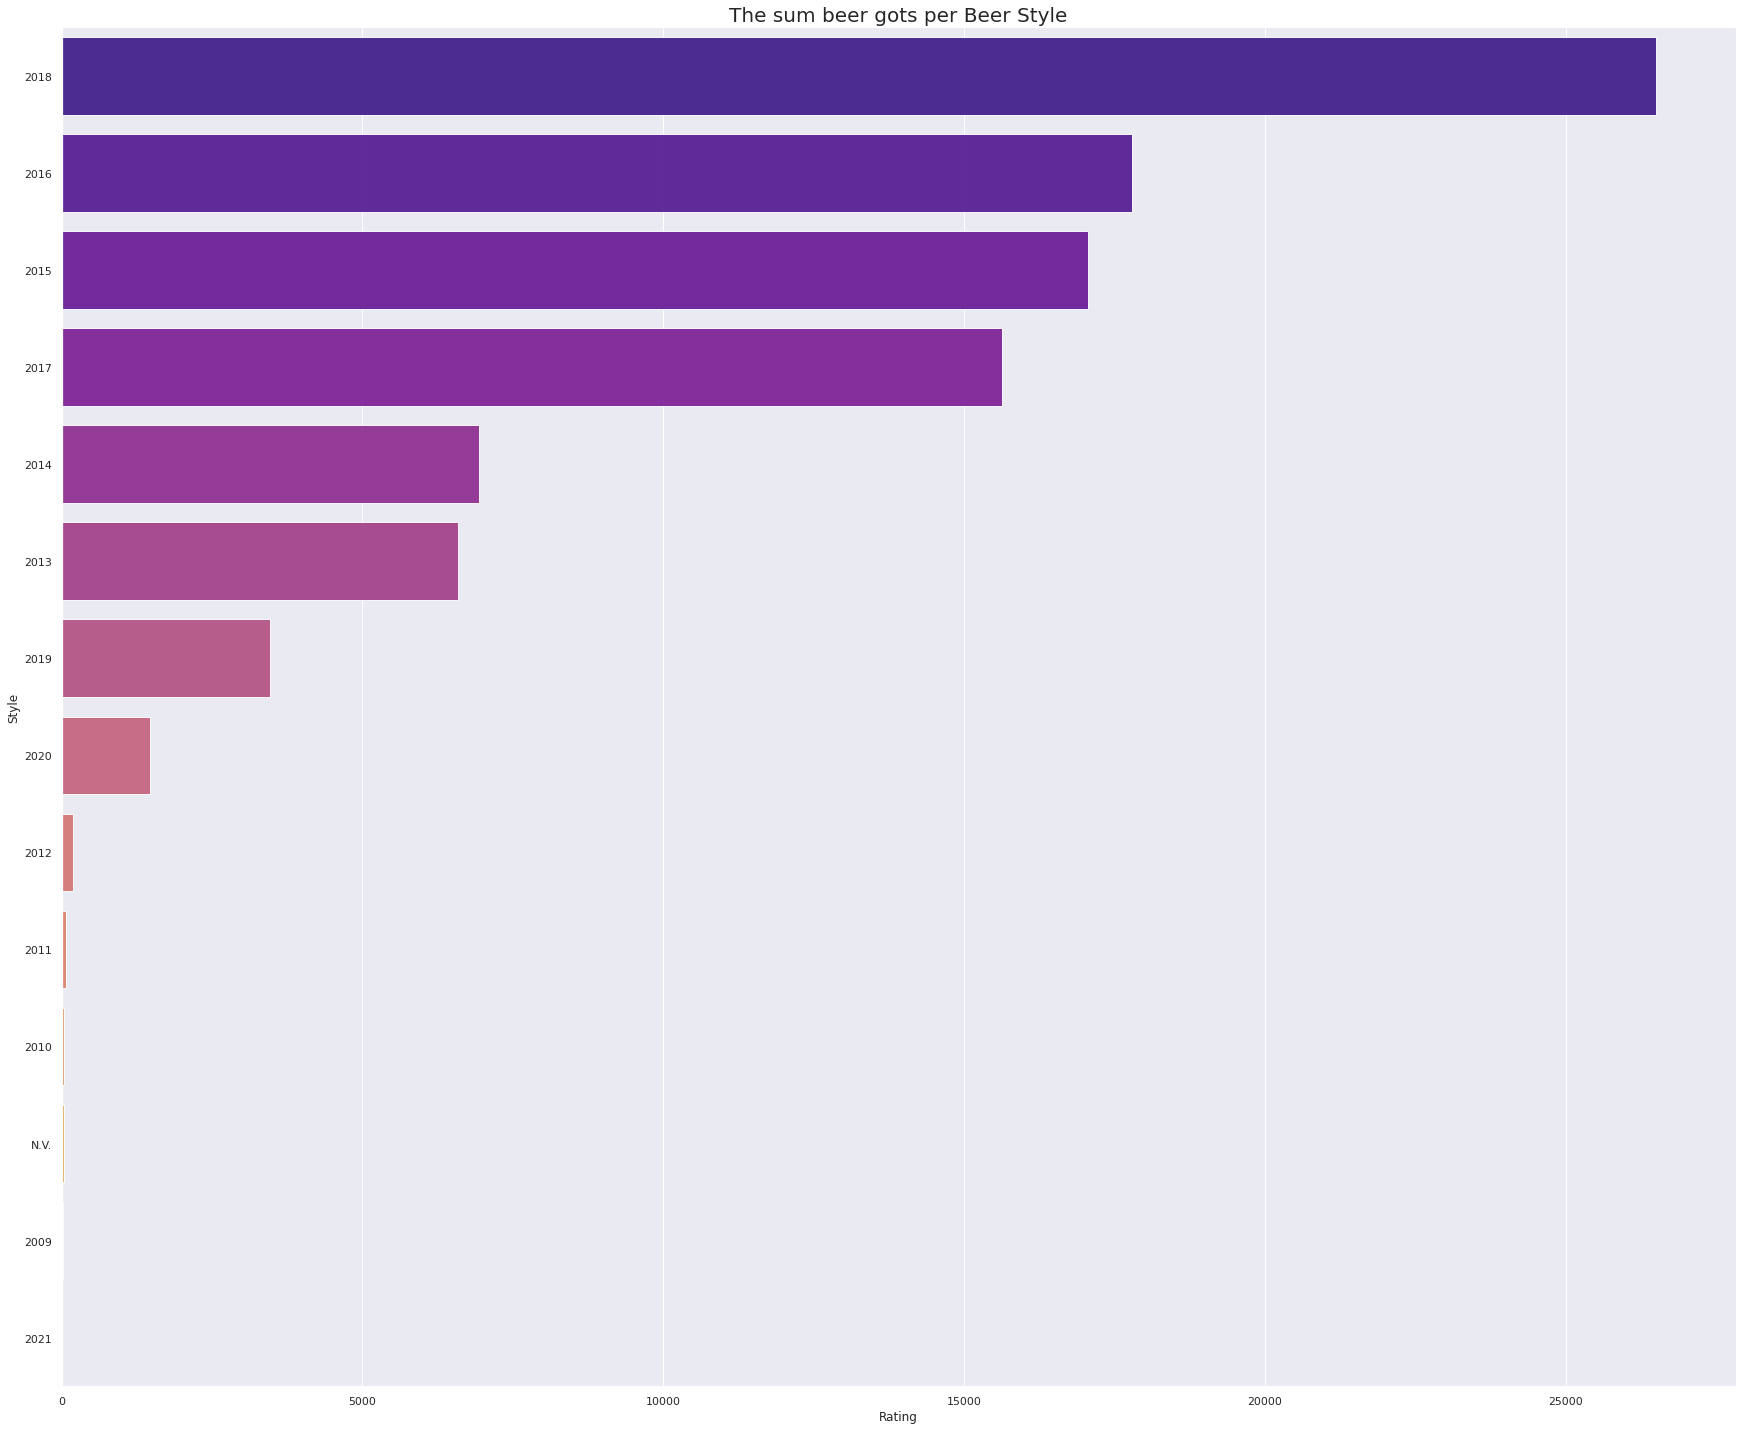

In [34]:
def sum_beerwants_per_categ(dataset):
    mean_pr_categ = dataset.groupby('Year')[['price']].sum().sort_values(by='price', ascending=False)
    price = []
    categ = []
    for i in range(len(mean_pr_categ)):
        price.append(mean_pr_categ.price[i])
        categ.append(mean_pr_categ.index[i])
    plt.figure(figsize=(30,25))
    plt.xlabel("Rating")    
    plt.ylabel("Style")
    graph = sns.barplot(x = price, y = categ, alpha =0.9, palette= "plasma")
    graph.set_title("The sum beer gots per Beer Style", fontsize = 20) 


sum_beerwants_per_categ(ideal_wine_df)

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import numpy as np


array = ideal_wine_df.values
X = np.array(array[:,4:7])
y = np.array(array[:,0])
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=1)


model1 = DecisionTreeClassifier()
model2 = GaussianNB()
model3 = KNeighborsClassifier()
model4 = LogisticRegression(solver='liblinear', multi_class='ovr')
model5 = LinearDiscriminantAnalysis()


kf = KFold(n_splits=2)
cv_results1 = cross_val_score(model1, X_train, Y_train, cv=kf.get_n_splits(X), scoring='accuracy')
cv_results2 = cross_val_score(model2, X_train, Y_train, cv=kf.get_n_splits(X), scoring='accuracy')
cv_results3 = cross_val_score(model3, X_train, Y_train, cv=kf.get_n_splits(X), scoring='accuracy')
cv_results4 = cross_val_score(model4, X_train, Y_train, cv=kf.get_n_splits(X), scoring='accuracy')
cv_results5 = cross_val_score(model5, X_train, Y_train, cv=kf.get_n_splits(X), scoring='accuracy')


print(f"Decision Tree: {np.mean(cv_results1):.3f} ({np.std(cv_results1):.3f})")
print(f"Gaussian Naive Bayes: {np.mean(cv_results2):.3f} ({np.std(cv_results2):.3f})")
print(f"K-Nearest Neighbors: {np.mean(cv_results3):.3f} ({np.std(cv_results3):.3f})")
print(f"Logistic Regression: {np.mean(cv_results4):.3f} ({np.std(cv_results4):.3f})")
print(f"Linear Discriminant Analysis: {np.mean(cv_results5):.3f} ({np.std(cv_results5):.3f})")

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=2.

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=2.

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=2.

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=2.

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=2.



Decision Tree: 0.768 (0.001)
Gaussian Naive Bayes: 0.754 (0.016)
K-Nearest Neighbors: 0.767 (0.000)
Logistic Regression: 0.369 (0.001)
Linear Discriminant Analysis: 0.479 (0.017)
